In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [10]:
string_col=df.select_dtypes("string").columns.to_list()
num_col=df.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
tf = df.copy()


In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
for col in tf.columns:
    tf[col] = pd.to_numeric(tf[col], errors='coerce')

In [15]:
tf_numeric = tf.select_dtypes(include=[np.number])

In [16]:
tf_numeric = tf_numeric.dropna(axis=1)

In [17]:
px.imshow(tf_numeric.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [18]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [19]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

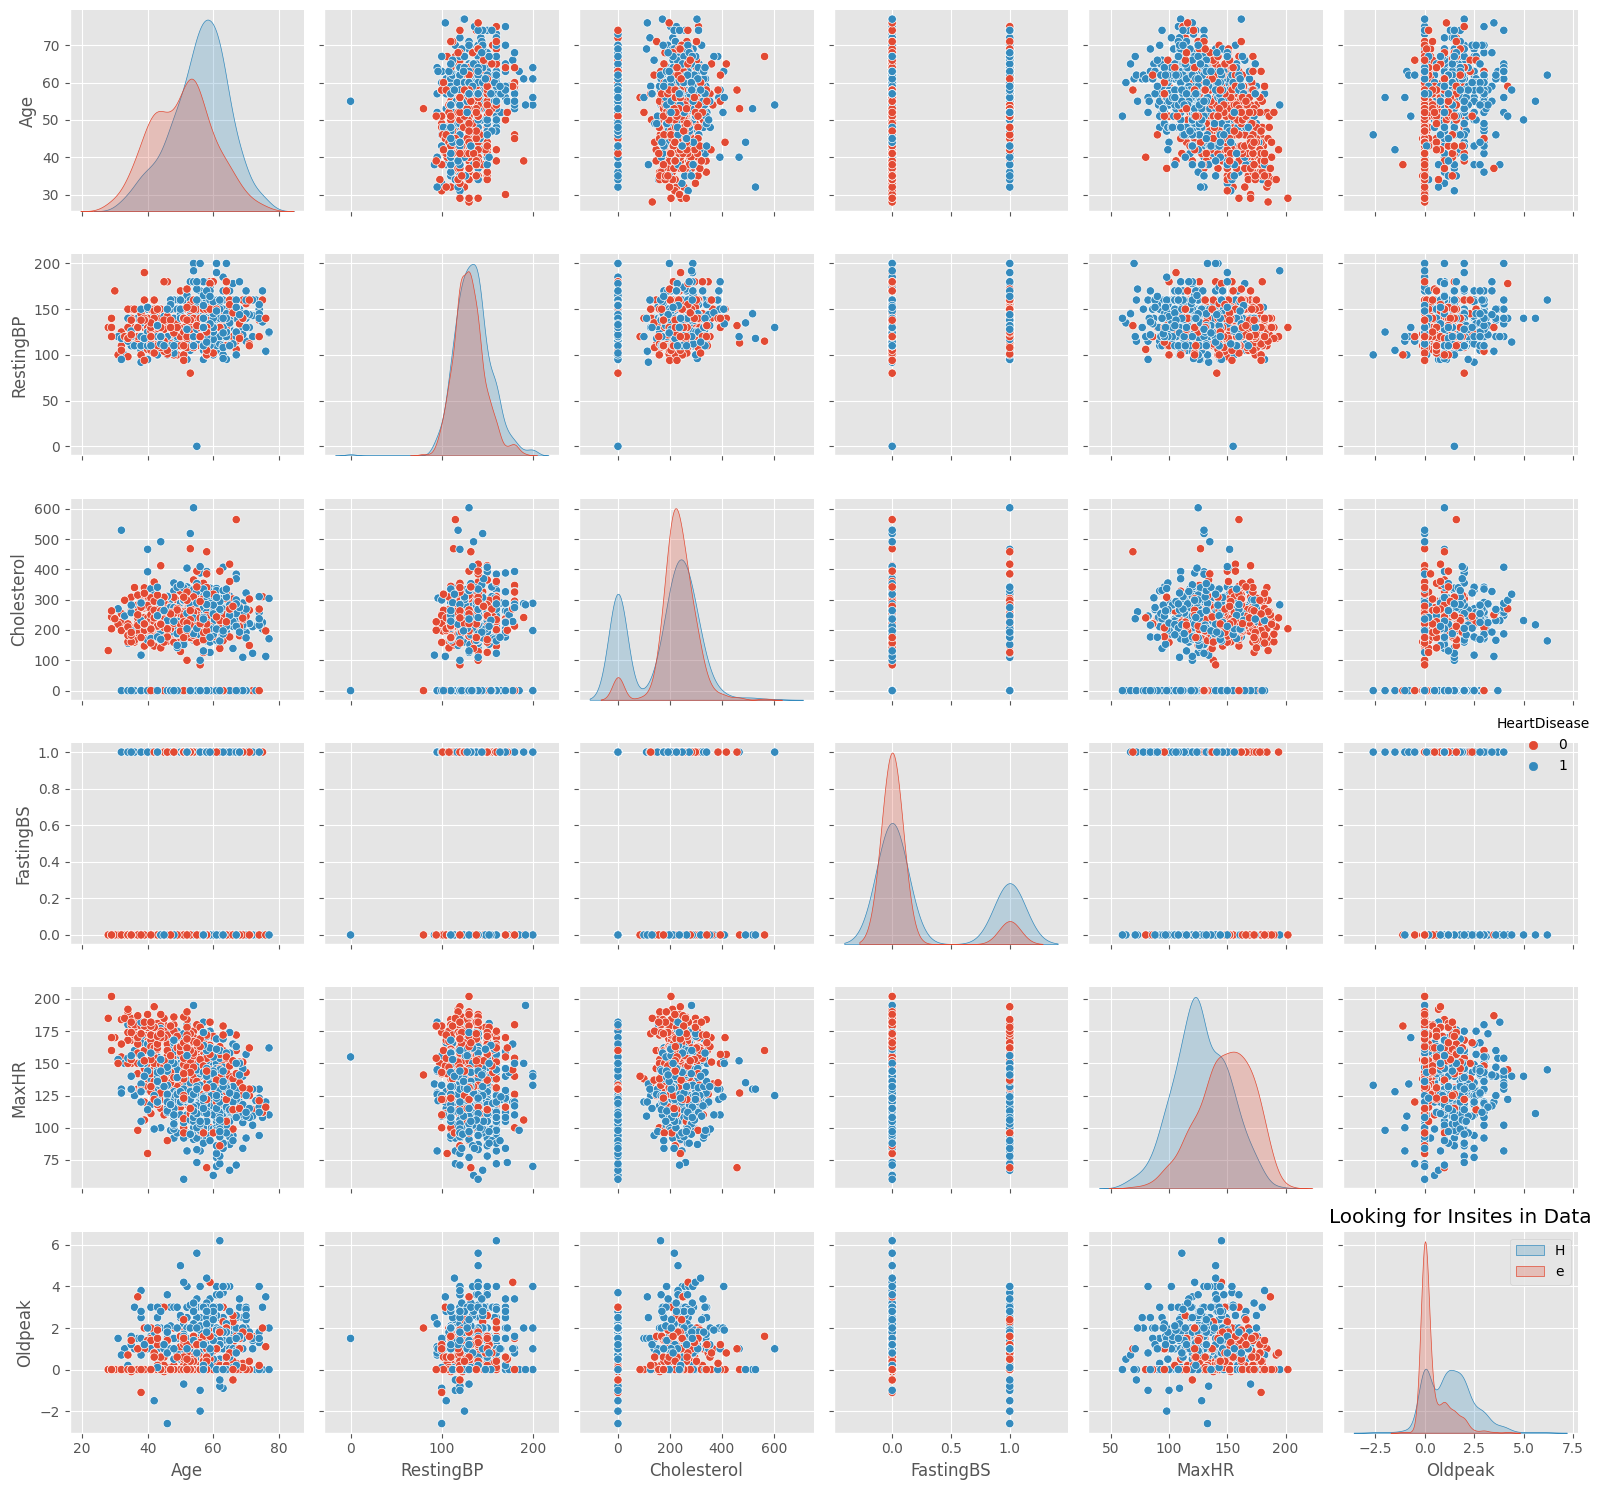

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

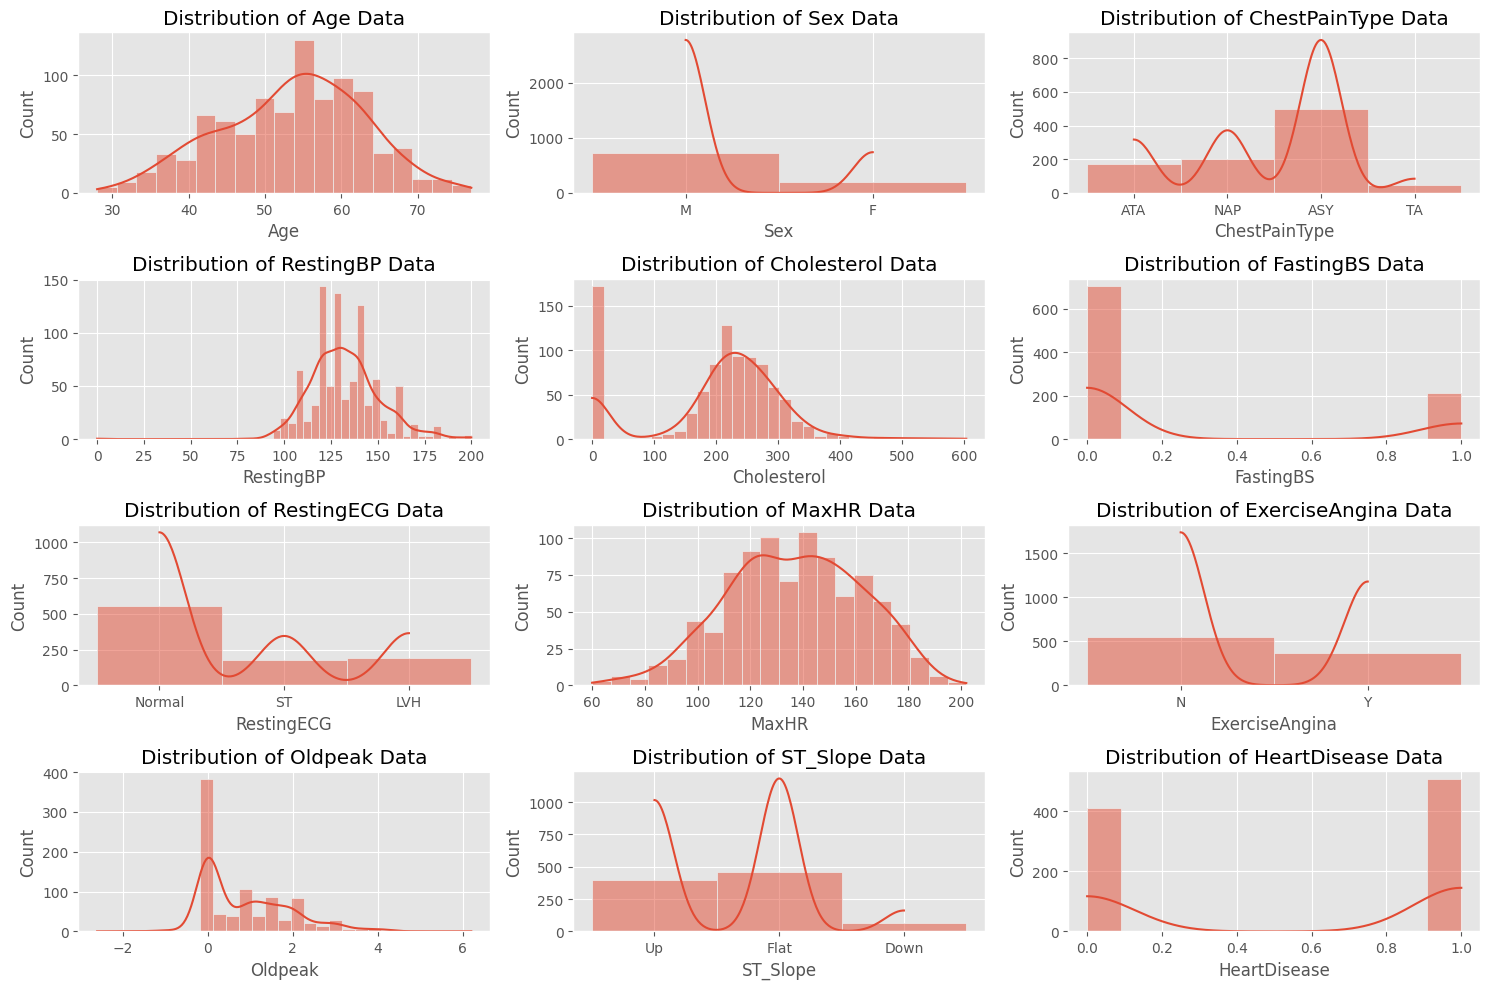

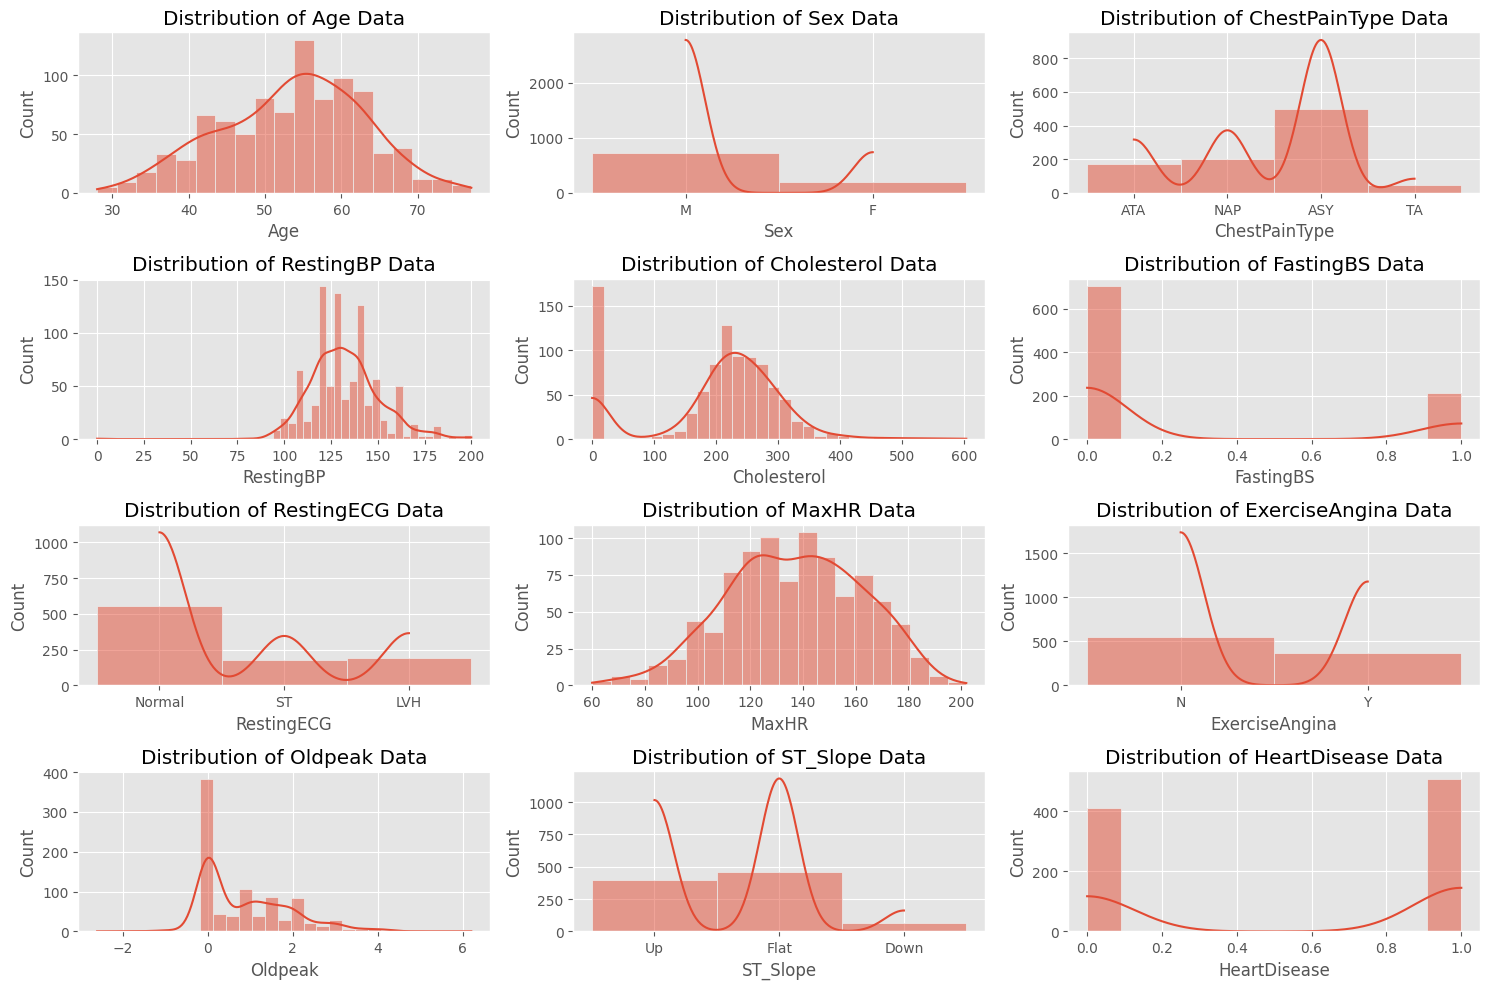

In [21]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

Outliers

In [22]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [23]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestBP",color="Sex")
fig.show()

In [24]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [25]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

Preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [19]:
df.isnull().sum(axis=0)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing data

Categorical Values

In [20]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


Label Encoding for Tree Based Algos

In [29]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


One Hot Encoding for NonTree Algos

In [21]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree = df_nontree.astype(int)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [22]:
df_nontree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   RestingBP          918 non-null    int64
 2   Cholesterol        918 non-null    int64
 3   FastingBS          918 non-null    int64
 4   MaxHR              918 non-null    int64
 5   Oldpeak            918 non-null    int64
 6   HeartDisease       918 non-null    int64
 7   Sex_F              918 non-null    int64
 8   Sex_M              918 non-null    int64
 9   ChestPainType_ASY  918 non-null    int64
 10  ChestPainType_ATA  918 non-null    int64
 11  ChestPainType_NAP  918 non-null    int64
 12  ChestPainType_TA   918 non-null    int64
 13  RestingECG_LVH     918 non-null    int64
 14  RestingECG_Normal  918 non-null    int64
 15  RestingECG_ST      918 non-null    int64
 16  ExerciseAngina_N   918 non-null    int64
 17  ExerciseAngina_Y

In [26]:
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


Non Tree Based Algos

In [24]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

Logistic Regression

In [28]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [52]:
from sklearn.linear_model import LogisticRegression
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_log.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")

mean_accl = np.mean(acc_log)
std_accl = np.std(acc_log)

print(f"Mean ROC AUC: {mean_accl}")
print(f"Standard Deviation of ROC AUC: {std_accl}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The ROC AUC for Fold 1 : 0.9497847919655666
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.81      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 2 : 0.9418938307030129
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                         

Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clfgnb = GaussianNB()
    clfgnb.fit(X_train, y_train)
    y_pred = clfgnb.predict(X_valid)
    y_prob = clfgnb.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_Gauss.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accg = np.mean(acc_Gauss)
std_accg = np.std(acc_Gauss)

print(f"Mean ROC AUC: {mean_accg}")
print(f"Standard Deviation of ROC AUC: {std_accg}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 1 : 0.9402199904351985
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The ROC AUC for Fold 2 : 0.9587517934002869
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                         

In [59]:
joblib.dump(ro_scaler, 'gaussian_nb_scaler.pkl')
joblib.dump(clfgnb, 'gaussian_nb_model.pkl')

['gaussian_nb_model.pkl']

In [54]:
X_new_scaled = [37,130,289,0,172,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1]
input_features_array = np.array(X_new_scaled).reshape(1, -1)

In [55]:

input_features_array = ro_scaler.transform(input_features_array)

In [56]:
y_pred_new = clfgnb.predict(input_features_array)

In [57]:
y_pred_new

array([0])

SVM

In [54]:
#linear kernel
from sklearn.svm import SVC
acc_svm = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel="linear", probability=True)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1] 
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_svm.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_acclin = np.mean(acc_svm)
std_acclin = np.std(acc_svm)

print(f"Mean ROC AUC: {mean_acclin}")
print(f"Standard Deviation of ROC AUC: {std_acclin}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The ROC AUC for Fold 1 : 0.9508608321377331
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 2 : 0.9420133907221425
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                         

In [55]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel="linear", probability=True)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_svm_sig.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accsig = np.mean(acc_svm_sig)
std_accsig = np.std(acc_svm_sig)

print(f"Mean ROC AUC: {mean_accsig}")
print(f"Standard Deviation of ROC AUC: {std_accsig}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The ROC AUC for Fold 1 : 0.9508608321377331
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 2 : 0.9420133907221425
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                         

In [56]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel="linear", probability=True)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_svm_rbf.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accsbf = np.mean(acc_svm_rbf)
std_accsbf = np.std(acc_svm_rbf)

print(f"Mean ROC AUC: {mean_accsbf}")
print(f"Standard Deviation of ROC AUC: {std_accsbf}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The ROC AUC for Fold 1 : 0.9508608321377331
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 2 : 0.9420133907221425
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                         

KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = df_nontree.loc[trn_, target]
    
    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = df_nontree.loc[val_, target]
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_KNN.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accknn = np.mean(acc_KNN)
std_accknn = np.std(acc_KNN)

print(f"Mean ROC AUC: {mean_accknn}")
print(f"Standard Deviation of ROC AUC: {std_accknn}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The ROC AUC for Fold 1 : 0.9661645145863222
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        82
           1       0.92      0.80      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

The ROC AUC for Fold 2 : 0.9304758488761358
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                         

Tree Based Algos

In [58]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [59]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_Dtree.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accdtree = np.mean(acc_Dtree)
std_accdtree = np.std(acc_Dtree)

print(f"Mean ROC AUC: {mean_accdtree}")
print(f"Standard Deviation of ROC AUC: {std_accdtree}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        82
           1       0.85      0.70      0.76       102

    accuracy                           0.76       184
   macro avg       0.77      0.77      0.76       184
weighted avg       0.78      0.76      0.76       184

The ROC AUC for Fold 1 : 0.7687709230033476
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        82
           1       0.88      0.68      0.77       102

    accuracy                           0.77       184
   macro avg       0.79      0.78      0.77       184
weighted avg       0.80      0.77      0.77       184

The ROC AUC for Fold 2 : 0.7833572453371592
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        82
           1       0.75      0.92      0.83       102

    accuracy                         

Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = RandomForestClassifier(n_estimators=200, criterion="entropy")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_RandF.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accrf = np.mean(acc_RandF)
std_accrf = np.std(acc_RandF)

print(f"Mean ROC AUC: {mean_accrf}")
print(f"Standard Deviation of ROC AUC: {std_accrf}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        82
           1       0.92      0.83      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

The ROC AUC for Fold 1 : 0.9479913916786227
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        82
           1       0.91      0.75      0.82       102

    accuracy                           0.82       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184

The ROC AUC for Fold 2 : 0.9389048302247729
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.62      0.76        82
           1       0.77      0.99      0.86       102

    accuracy                         

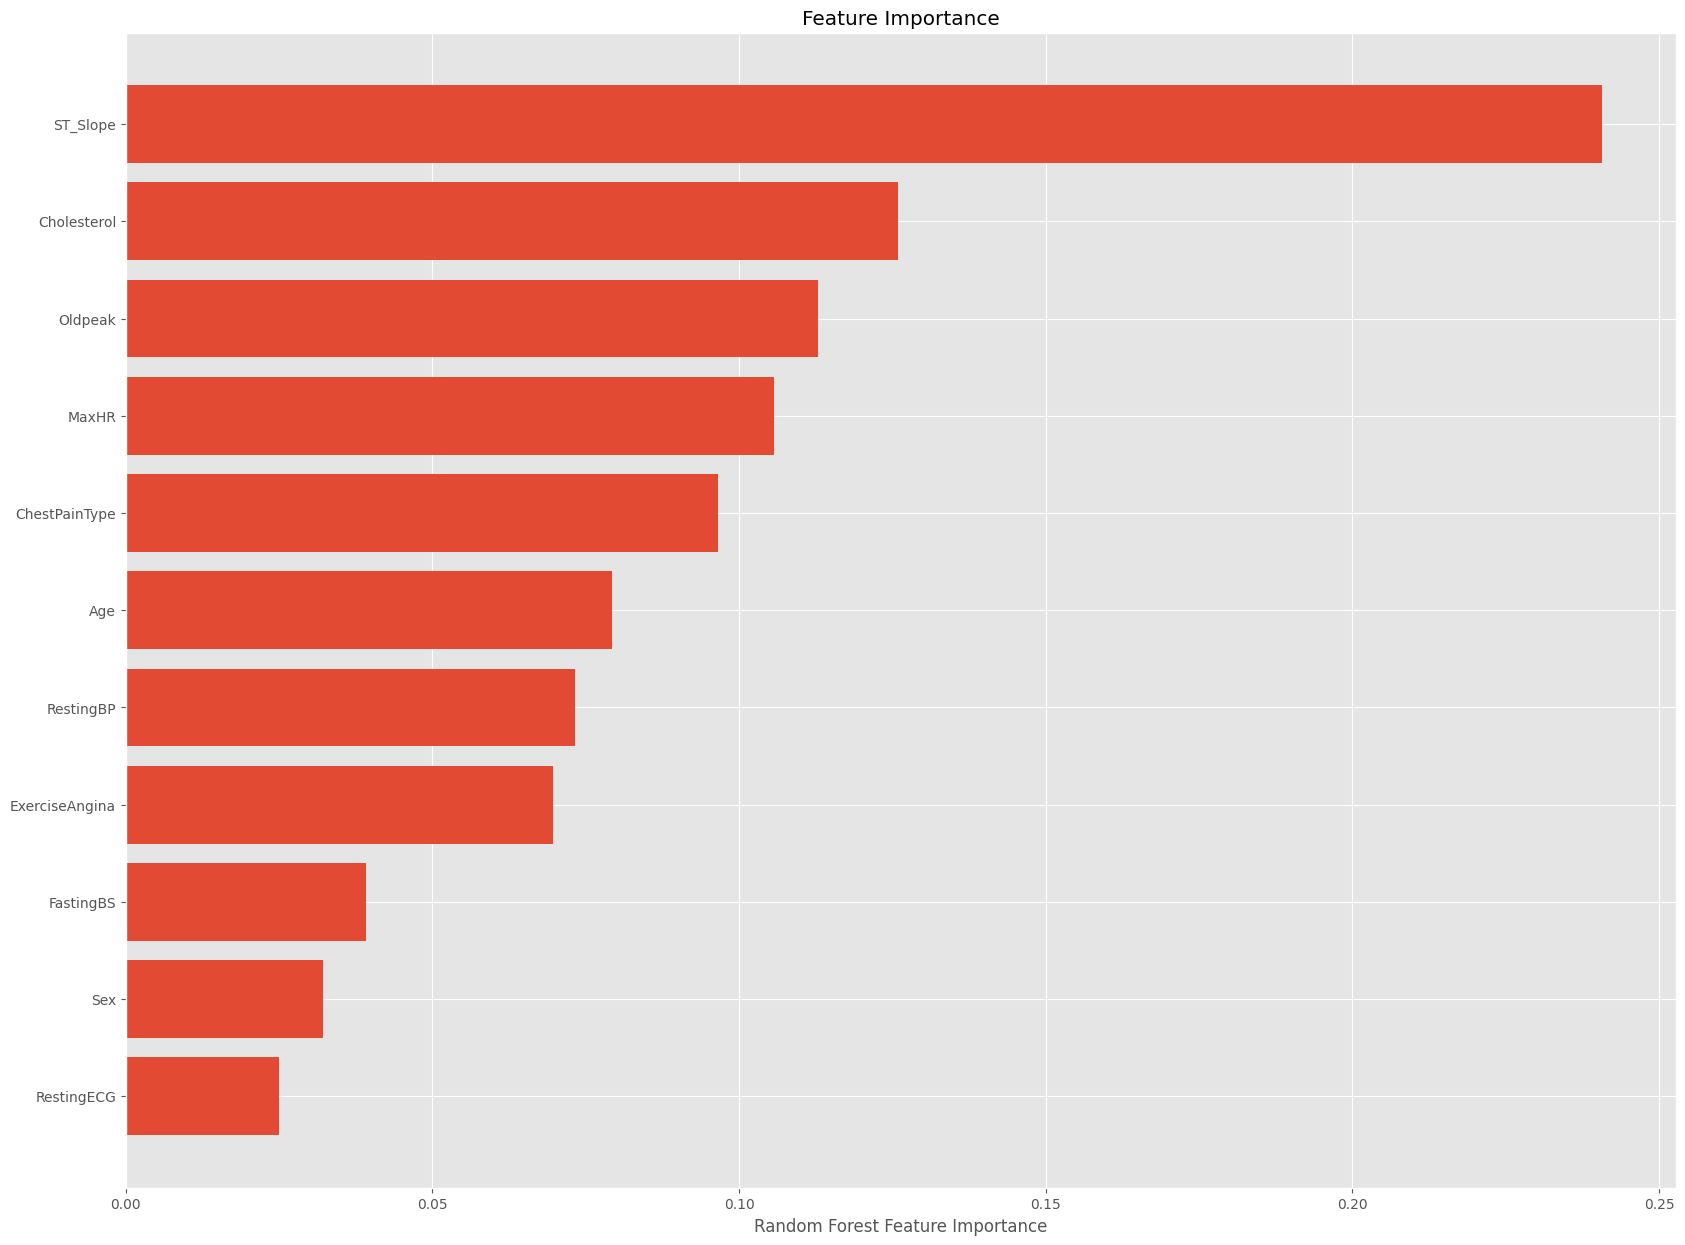

In [61]:
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

XGBoost

In [62]:
from xgboost import XGBClassifier
acc_XGB = []

kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_tree, y=y)):
    
    X_train = df_tree.loc[trn_, feature_col_tree]
    y_train = df_tree.loc[trn_, target]
    
    X_valid = df_tree.loc[val_, feature_col_tree]
    y_valid = df_tree.loc[val_, target]
    
    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  
    
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_prob)
    acc_XGB.append(acc)
    print(f"The ROC AUC for Fold {fold+1} : {acc}")


mean_accxgb = np.mean(acc_XGB)
std_accxgb = np.std(acc_XGB)

print(f"Mean ROC AUC: {mean_accxgb}")
print(f"Standard Deviation of ROC AUC: {std_accxgb}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The ROC AUC for Fold 1 : 0.9491869918699187
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The ROC AUC for Fold 2 : 0.9316116690578671
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                         

Comparing all the classifiers

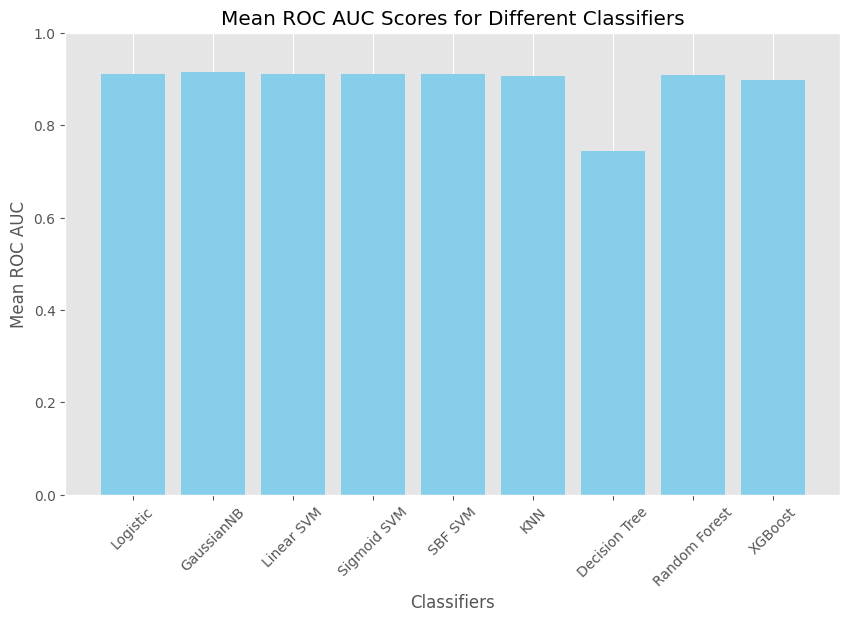

In [64]:
import matplotlib.pyplot as plt


mean_scores = [mean_accl, mean_accg, mean_acclin, mean_accsig, mean_accsbf, mean_accknn, mean_accdtree, mean_accrf, mean_accxgb]
classifiers = ['Logistic', 'GaussianNB', 'Linear SVM', 'Sigmoid SVM', 'SBF SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, mean_scores, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC Scores for Different Classifiers')
plt.xticks(rotation=45)
plt.ylim([0, 1])  
plt.grid(axis='y')

plt.show()


In [65]:
best_classifier, best_score = max(zip(classifiers, mean_scores), key=lambda x: x[1])

print(f"The best performing model is {best_classifier} with a mean ROC AUC score of {best_score:.2f}")

The best performing model is GaussianNB with a mean ROC AUC score of 0.91
